# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 2.0) Gert Herold, 2020 -->

Wegen Reparaturarbeiten an der Staumauer einer Talsperre soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass auf Grundhöhe habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

**1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?** 

In [17]:
import math

A0=10*1000**2 # Oberfläche in Quadratmetern
V0=215*10**6     # Volumen in Kubikmetern

h0=3*V0/(A0)
print("Die maximale Tiefe beträgt: ",h0 ,"Meter")


Die maximale Tiefe beträgt:  64.5 Meter


Vereinfachend werde angenommen, dass die sich ausbildende Strömung sich mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschreiben lasse:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei beschreibt $u$ die Strömungsgeschwindigkeit des Fluids an einer beliebigen betrachteten Stelle, $p$ den hydrodynamischen Druck, $\rho$ die Dichte und $z$ die Höhe. $g=9{,}81\frac{\text{m}}{\text{s}^2}$ ist die Erdbeschleunigung. Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g \, z_\text{oben} = \frac{u_\text{unten}^2}{2}+g \, z_\text{unten}
$$

**2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ sowie den Volumenstrom $\dot{V_0}$ unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [26]:
def Ausflussgeschwindigkeit(h):

    g=9.81  # Erdbeschleunigung in m/s^2

    U=(2*(g*h))**0.5 # Ausflussgeschwindigkeit in m/s
    return U

U0=Ausflussgeschwindigkeit(h0)
print(f"Die Geschwindigkeit bei vollen Füllstand beträgt unten: {U0:.2f} m/s")

Die Geschwindigkeit bei vollen Füllstand beträgt unten: 35.57 m/s


Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [84]:
from numpy import pi

# Berechne den "Radius" der Seeoberfläche
r0 = (A0/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

Radius: 1.78 km
215000000


**3) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees allgemein abhängig von der enthaltenen Wassermenge bestimmt.**

In [88]:
def tiefe(V):
    h=(3/pi*h0**2/(r0**2)*V)**(1/3) 
    return h

h=tiefe(215*10**6)
print(f'Die Tiefe beträgt: {h:.2f} m')

Die Tiefe beträgt: 64.50 m
[64.49999999999999, 61.94095649266515, 59.2094761173876, 56.270321267189374, 53.07473598679355, 49.55195729617794, 45.592402932321875, 41.009757320393895, 35.43671011748743, 27.915220690293722, 11.608225817996598]


**4) Schreiben Sie eine Funktion, die ausgehend von einem Startvolumen $V_0$ und einer gegebenen Zeitschrittweite $\Delta t$ den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt. Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.** *(Hinweis: Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.)*

In [91]:
def abfluss(V0, dt, Fall):  # Fall =='Kegel' oder 'Zylinder'
    V=V0   # Startvolumen in m^3
    A_Auslass=2  # Auslassfläche in m^2
    i=0
    t_list=[]
    h_list=[]
    
    while V>=0 :
        if Fall=='Kegel':
            h=tiefe(V) # Akutelle Tiefe in m für den Kegel
        elif Fall=='Zylinder':   
            h=tiefeZylinder(V) # Akutelle Tiefe in m für den Zylinder
            
        U=Ausflussgeschwindigkeit(h) #Aktuelle Ausflussgeschwindigkeit in m/s
        V_Strom=U*A_Auslass # Aktueller Volumenstrom in m^3/s
        V=V-V_Strom*dt #Volumenschritt nach expliziter Zeititereation
        
        t_list=t_list+[i*dt]
        h_list=h_list+[h]
        i+=1
    return t_list, h_list 

**5) Wie lange dauert es, bis der Stausee komplett abgelassen wurde? Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:**
  * $\Delta t_1$ = 1 Minute
  * $\Delta t_2$ = 4 Tage

**Diskutieren Sie Auffälligkeiten.**

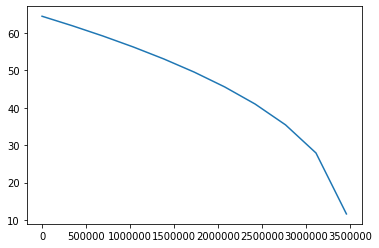

In [92]:
%matplotlib inline
from matplotlib.pyplot import plot, show

#t=1*60        # 1 Minute in Sekunden
dt=1*60*60*24*4        # 4 Tage in Sekunden

[t_list, h_list]=abfluss(V0,dt,'Kegel')

plot(t_list, h_list)
show()

**6) Wiederholen Sie Aufgabenteil 5) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Vermeiden Sie soweit wie möglich redundanten Code.**

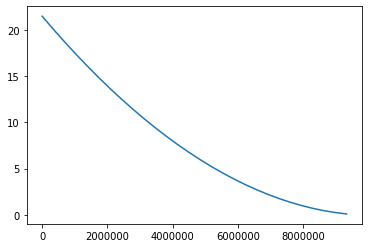

In [93]:
def tiefeZylinder(V):
    h=V/(r0**2*pi) 
    return h

%matplotlib inline
from matplotlib.pyplot import plot, show

#dt=1*60        # 1 Minute in Sekunden
dt=1*60*60*24*4        # 4 Tage in Sekunden

[t_list, h_list]=abfluss(V0,dt,'Zylinder')

plot(t_list, h_list)
show()